# Inverse Transform Sampling

To use Inverse Transform Sampling method to generate random variables of different distribution, the key idea is to get the **inversion function of the cumulative distribution function (CDF)** of a specific distribution.

Here I use **exponential distribution** and **Laplace distribution** as examples to show you how to generate random variables by using inverse transform sampling.

In [1]:
import random
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

## Exponential Distribution
The inversion function of exponential distribution is $X=-\ln\frac{\left(U\left(0,1\right)\right)}{\mu}$. *(Ref: https://en.wikipedia.org/wiki/Exponential_distribution#Random_variate_generation).*

Text(0, 0.5, 'Density')

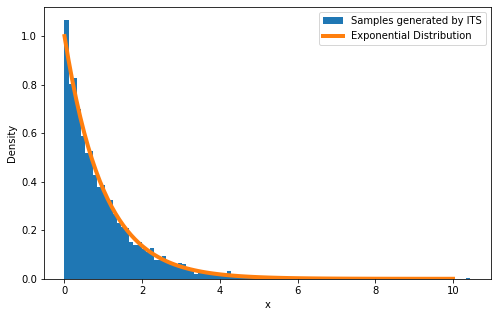

In [2]:
from scipy.stats import expon

# inverse transform sampling
sample_num = 5000
# parameters of exponential distribution
mu = 1
# U(0,1)
u = uniform.rvs(size = 5000)
x = -np.log(u) / mu
plt.figure(figsize = (8, 5))
plt.hist(x, bins=100, density = True, label = 'Samples generated by ITS')

# generate exponential distribution using scipy.stats.expon
x_n = np.linspace(0, 10, 100)
plt.plot(x_n, expon().pdf(x_n), lw = 4, label = 'Exponential Distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')

The output graph is shown above. We can see that the sample distribution generated by inverse transform sampling fits the standard exponential distribution.

## Laplace Distribution
The inversion function of Laplace distribution is $X=\mu-b\times sgn\left(U\left(0,1\right)\right)\times\ln\left(1-2\vert U\left(0,1\right)\vert\right)$. *(Ref: https://en.wikipedia.org/wiki/Laplace_distribution#Random_variate_generation)*.

Text(0, 0.5, 'Density')

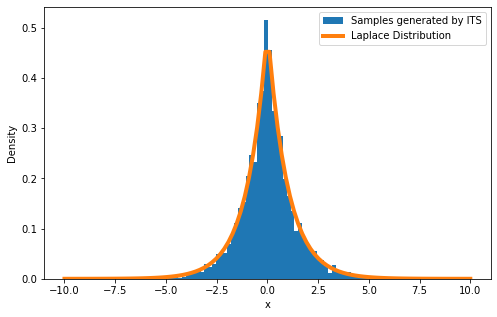

In [3]:
from scipy.stats import laplace

# inverse transform sampling
sample_num = 5000
# parameters of normal distribution
b = 1
mu = 0
# U(0,1)
u = uniform.rvs(size = 5000)
x = mu - b * np.sign(u-0.5) * np.log(1 - 2 * np.abs(u - 0.5))
plt.figure(figsize = (8, 5))
plt.hist(x, bins=100, density = True, label = 'Samples generated by ITS')

# generate Laplace distribution using scipy.stats.laplace
x_n = np.linspace(-10, 10, 100)
plt.plot(x_n, laplace().pdf(x_n), lw = 4, label = 'Laplace Distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')